<a href="https://colab.research.google.com/github/AviWilbur/ML_Predict_NBA_Rookie/blob/main/ONO_Mid_term_exercise_2023_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mid-term exercise - Avi Wilbur
predicting whether rookie NBA players will remain in the NBA for more than five years based on various features. The dataset is preprocessed using techniques such as handling missing values, scaling features, and balancing the classes to ensure accurate predictions. Machine learning models, including Random Forest and Gradient Boosting classifiers, are employed to train and evaluate the predictive performance using metrics like accuracy, precision, and recall. The project also involves data visualization to understand the distribution of the target variable.



#1. Load your libraries here:

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.metrics import classification_report



#Upload your data file:

In [ ]:
# predict if rookie NBA will be in the NBA for more than 5 years
from google.colab import files
file = files.upload()

Saving nba_logreg.csv to nba_logreg (2).csv


#2. Read the file into a pandas data frame:
Split your data to:

X: the feature matrix

y: the label vector

In [ ]:

dataset_path ='nba_logreg.csv'

data = pd.read_csv(dataset_path)

target_column = 'TARGET_5Yrs'
names_column = 'Name'

X = data.drop(columns=[names_column,target_column])
y = data[target_column]
z = data[names_column]

#3. A. create and print a plot that demonstartes the frequency of each class of the label variable (Y). In addition, print the count of each of the classes  of the label variable (Y).

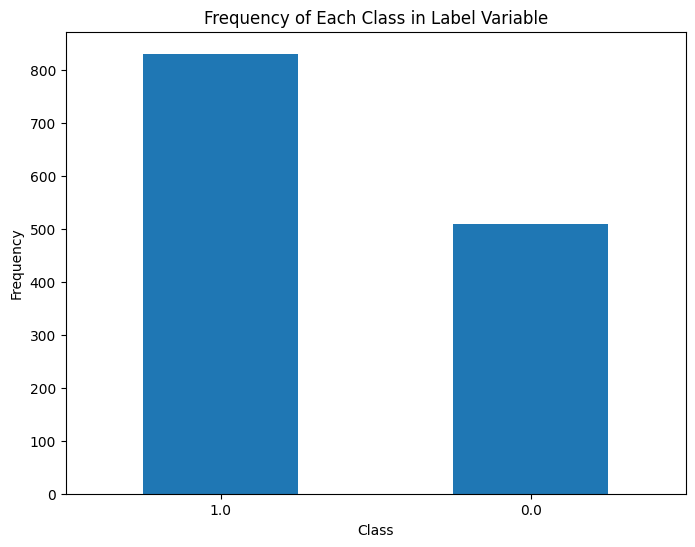

Class Counts:
1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64


In [ ]:

plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar')
plt.title('Frequency of Each Class in Label Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


class_counts = data[target_column].value_counts()
print("Class Counts:")
print(class_counts)

#B. Verbally explain if balancing the label is required, why? (in 2-3 lines)


#Your answer here:
balancing is required when there is a signifacent inbalance between the classes, if the classes are widely inbalanced the algorithem can perform poorly towards the minority class. in my case the inbalance isnt so severe hence no need for balancing.



#C. If balancing is required, choose one over-sampling and one under-sampling balancing methods and perform them on your data.

Verbally explain the logic behind the chosen balancing metohd, how does it work?

#Your answer here:



#If balancing is not required, briefly explain why and choose one under-sampling method and one over-sampling method for balancing and perform them on your data.
Additionally, verbally explain the logic behind the chosen balancing metohds, how does it work? (in 3 lines) answer:
I explained above why balancing is not required, as for the logic i chose the majority stradegy so that the majority class will decrease to match the size of the minority class for complete balance and for the over sampling i chose 0.8 strategy so that the minority class will increase and be 80% of the majority class for a better balance between the classes.


In [ ]:


print("Class distribution before sampling:")
print(y.value_counts())


chosen_under_sampler = RandomUnderSampler(sampling_strategy='majority')
chosen_over_sampler = RandomOverSampler(sampling_strategy=0.8)


X_resampled_under, y_resampled_under = chosen_under_sampler.fit_resample(X, y)
X_resampled_over, y_resampled_over = chosen_over_sampler.fit_resample(X, y)


print("\nClass distribution after under-sampling:")
print(y_resampled_under.value_counts())

print("\nClass distribution after over-sampling:")
print(y_resampled_over.value_counts())

Class distribution before sampling:
1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

Class distribution after under-sampling:
0.0    509
1.0    509
Name: TARGET_5Yrs, dtype: int64

Class distribution after over-sampling:
1.0    831
0.0    664
Name: TARGET_5Yrs, dtype: int64


#4. Check for missing values:

In [ ]:

missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)
#there are no missing data the 0 in 3p% is data.


Missing Values:
Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


If there are no missing values in your data, follow the next steps:
1. uncomment the following function by:

  a. selecting all the code in the chunk

  b. pressing "ctrl"+"/" to uncomment all lines
2. assign the missing values-containing data to a new variable name (see example below).

Say my dataset features is named X.

Than the use of the function would be:


```
X_missing=add_missing_values(X)
 ```






In [ ]:
def add_missing_values(X_full):
    import numpy as np
    Col_names=X_full.columns
    X_full=X_full.to_numpy()
    rng = np.random.RandomState(4)
    n_samples, n_features = X_full.shape

    # Add missing values in 75% of the lines
    missing_rate = 0.75
    n_missing_samples = int(n_samples * missing_rate)

    missing_samples = np.zeros(n_samples, dtype=bool)
    missing_samples[:n_missing_samples] = True

    rng.shuffle(missing_samples)
    missing_features = rng.randint(0, n_features, n_missing_samples)
    X_missing = X_full.copy()
    X_missing[missing_samples, missing_features] = np.nan
    X_missing=pd.DataFrame(X_missing)
    X_missing.columns=Col_names
    return X_missing
# X_missing


In [ ]:

X_missing = add_missing_values(X)
print("Missing Values:")
print(X_missing)



Missing Values:
        GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
0     36.0  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   
1     35.0  26.9  7.2  2.0  6.7  29.6      NaN  2.8  23.5  2.6  3.4  76.5   
2     74.0  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3   NaN   
3     58.0  11.6  NaN  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   
4     48.0  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   
...    ...   ...  ...  ...  ...   ...      ...  ...   ...  ...  ...   ...   
1335  80.0  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  1.2  1.5  79.2   
1336  68.0  12.6  NaN  1.5  4.1  35.8      0.1  0.7  16.7  0.8  1.0  79.4   
1337  43.0  12.1  5.4  2.2  3.9   NaN      0.0  0.0   0.0  1.0  1.6  64.3   
1338  52.0  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  1.2  1.8  62.5   
1339  47.0  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  0.7  1.0  67.3   

      OREB  DREB  REB  AST  STL  BLK  TOV  
0      0.7   3.


#5. Impute the missing values using three different methods and assign the imputed output datasets into variables:

In [ ]:


mean_imputer = SimpleImputer(strategy='mean')
X_mean_imputed = mean_imputer.fit_transform(X_missing)


median_imputer = SimpleImputer(strategy='median')
X_median_imputed = median_imputer.fit_transform(X_missing)


knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = knn_imputer.fit_transform(X_missing)

# Convert the imputed arrays back to DataFrames
X_mean_imputed_df = pd.DataFrame(X_mean_imputed,columns= X.columns)
X_median_imputed_df = pd.DataFrame(X_median_imputed, columns= X.columns)
X_knn_imputed_df = pd.DataFrame(X_knn_imputed, columns= X.columns)


print("Mean Imputed Values:")
print(X_mean_imputed_df.head())

print("\nMedian Imputed Values:")
print(X_median_imputed_df.head())

print("\nKNN Imputed Values:")
print(X_knn_imputed_df.head())


Mean Imputed Values:
     GP   MIN       PTS  FGM  FGA   FG%   3P Made  3PA   3P%  FTM  FTA  \
0  36.0  27.4  7.400000  2.6  7.6  34.7  0.500000  2.1  25.0  1.6  2.3   
1  35.0  26.9  7.200000  2.0  6.7  29.6  0.248137  2.8  23.5  2.6  3.4   
2  74.0  15.3  5.200000  2.0  4.7  42.2  0.400000  1.7  24.4  0.9  1.3   
3  58.0  11.6  6.790532  2.3  5.5  42.6  0.100000  0.5  22.6  0.9  1.3   
4  48.0  11.5  4.500000  1.6  3.0  52.4  0.000000  0.1   0.0  1.3  1.9   

         FT%      OREB  DREB       REB  AST  STL  BLK  TOV  
0  69.900000  0.700000   3.4  3.027132  1.9  0.4  0.4  1.3  
1  76.500000  0.500000   2.0  2.400000  3.7  1.1  0.5  1.6  
2  70.287731  0.500000   1.7  2.200000  1.0  0.5  0.3  1.0  
3  68.900000  1.000000   0.9  1.900000  0.8  0.6  0.1  1.0  
4  67.400000  1.009246   1.5  2.500000  0.3  0.3  0.4  0.8  

Median Imputed Values:
     GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  36.0  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3

#6. Preprocessing (for both imputed datasets):
standardize or normalize the data


In [ ]:


scaler_mean = StandardScaler()
X_mean_imputed_scaled = scaler_mean.fit_transform(X_mean_imputed_df)

scaler_median = StandardScaler()
X_median_imputed_scaled = scaler_median.fit_transform(X_median_imputed_df)

scaler_knn = StandardScaler()
X_knn_imputed_scaled = scaler_knn.fit_transform(X_knn_imputed_df)

#7. Train test split:

In [ ]:


X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(
    X_mean_imputed_scaled, y, test_size=0.2, random_state=42
)

X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(
    X_median_imputed_scaled, y, test_size=0.2, random_state=42
)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn_imputed_scaled, y, test_size=0.2, random_state=42
)


#8. Training models (for both imputed datasets):
**a.** choose **three** classification algorithms, one must be either random forest or XGBoost or catboost,another must be an algorithm that **wasn't** discussed in class and apply the algorithms on the train set.  

**b.** apply hyperparameter tuning on  two out of three algorithms using gridsearchCV function.

Apply a pipeline to the learning process of one of the algorithms, pipeing must include:


*   imputation
*   standardization or normalization
*   chossing the learning algorithm and a dictionary for the hyperparameter search.

##In this part you should create 9 learning models: 3 imputed dataframes * 3 algorithms

**c.** print the best hyperparameters for both models.
reminder, if the tuned model is named "grid" than to get the best hyperparameter combination use the following function:


```
grid.best_params_
```


**d.** Veraverbally explain: what is the role of the chosen hyperparmeters in the learning algorithms? Explain how the unlearned algorithm that you chose works. (in 3-4 lines)


In [ ]:


random_forest_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifiers on the training data
random_forest_classifier.fit(X_train_mean, y_train_mean)
random_forest_classifier.fit(X_train_median, y_train_median)
random_forest_classifier.fit(X_train_knn, y_train_knn)

knn_classifier.fit(X_train_mean, y_train_mean)
knn_classifier.fit(X_train_median, y_train_median)
knn_classifier.fit(X_train_knn, y_train_knn)


gradient_boosting_classifier.fit(X_train_mean, y_train_mean)
gradient_boosting_classifier.fit(X_train_median, y_train_median)
gradient_boosting_classifier.fit(X_train_knn, y_train_knn)


# Hyperparameter tuning using GridSearchCV for RandomForest and GradientBoosting
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(random_forest_classifier, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_mean, y_train_mean)
grid_search_rf.fit(X_train_median, y_train_median)
grid_search_rf.fit(X_train_knn, y_train_knn)

param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search_gb = GridSearchCV(gradient_boosting_classifier, param_grid_gb, cv=5)
grid_search_gb.fit(X_train_mean, y_train_mean)
grid_search_gb.fit(X_train_median, y_train_median)
grid_search_gb.fit(X_train_knn, y_train_knn)

# Creating a pipeline for k-Nearest Neighbors
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

print("RandomForest Best Hyperparameters:")
print(grid_search_rf.best_params_)


print("GradientBoosting Best Hyperparameters:")
print(grid_search_gb.best_params_)

RandomForest Best Hyperparameters:
{'max_depth': 10, 'n_estimators': 200}
GradientBoosting Best Hyperparameters:
{'learning_rate': 0.1, 'n_estimators': 50}


#Your answer here:

the role of hyperparmeters are to influence how the algorithm learns and generalizes from the data.  in RandomForest and GradientBoosting, the n_estimators hyperparameter defines the number of decision trees to be created. max_depth controls the depth of these trees.
learning_rate controls the step size at which the algorithm adjusts its predictions based on the error from the previous models.

unlearned algorithm - Gradient Boosting works by iteratively training weak models, each focused on correcting the errors of the previous model, using gradients of the loss function to guide adjustments, and combining their predictions with scaled weights to form a strong predictive model.

#9. A. Predict the y variable on both the train set and the test set (for both imputed datasets and for both algorithms - 18 predictions in total):
3 imputed datasets * 3 classification algorithms * (train+test)

and create and print a summrizing table of the accuracy, recall, precision and f1-score of each prediction.



In [ ]:


imputed_datasets = ['mean', 'median', 'knn']
classifiers = [random_forest_classifier, knn_classifier, gradient_boosting_classifier]

results = {'imputed_dataset': [], 'classifier': [], 'set': [], 'accuracy': [], 'recall': [], 'precision': [], 'f1_score': []}


for imputed_data in imputed_datasets:
    for clf in classifiers:
        if imputed_data == 'mean':
            X_train = X_train_mean
            X_test = X_test_mean
            y_train = y_train_mean
            y_test = y_test_mean
        elif imputed_data == 'median':
            X_train = X_train_median
            X_test = X_test_median
            y_train = y_train_median
            y_test = y_test_median
        elif imputed_data == 'knn':
            X_train = X_train_knn
            X_test = X_test_knn
            y_train = y_train_knn
            y_test = y_test_knn

        # Fit the classifier on the train data
        clf.fit(X_train, y_train)

        # Predict on train and test data
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        # Calculate evaluation metrics for train and test sets
        accuracy_train = accuracy_score(y_train, y_pred_train)
        recall_train = recall_score(y_train, y_pred_train)
        precision_train = precision_score(y_train, y_pred_train)
        f1_train = f1_score(y_train, y_pred_train)

        accuracy_test = accuracy_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test)
        f1_test = f1_score(y_test, y_pred_test)

        # Store the results in the dictionary
        results['imputed_dataset'].append(imputed_data)
        results['classifier'].append(str(clf))
        results['set'].append('Train')
        results['accuracy'].append(accuracy_train)
        results['recall'].append(recall_train)
        results['precision'].append(precision_train)
        results['f1_score'].append(f1_train)

        results['imputed_dataset'].append(imputed_data)
        results['classifier'].append(str(clf))
        results['set'].append('Test')
        results['accuracy'].append(accuracy_test)
        results['recall'].append(recall_test)
        results['precision'].append(precision_test)
        results['f1_score'].append(f1_test)


summary_table = pd.DataFrame(results)


print(summary_table)

   imputed_dataset                                   classifier    set  \
0             mean      RandomForestClassifier(random_state=42)  Train   
1             mean      RandomForestClassifier(random_state=42)   Test   
2             mean                       KNeighborsClassifier()  Train   
3             mean                       KNeighborsClassifier()   Test   
4             mean  GradientBoostingClassifier(random_state=42)  Train   
5             mean  GradientBoostingClassifier(random_state=42)   Test   
6           median      RandomForestClassifier(random_state=42)  Train   
7           median      RandomForestClassifier(random_state=42)   Test   
8           median                       KNeighborsClassifier()  Train   
9           median                       KNeighborsClassifier()   Test   
10          median  GradientBoostingClassifier(random_state=42)  Train   
11          median  GradientBoostingClassifier(random_state=42)   Test   
12             knn      RandomForestCl

#B. Verbally explain which model resulted with the best outcome with consideration to over-fitting, under-fitting and proper-fitting.

#Your answer here:
the data shows that gradient boosting and and random forest perform the best, perhaps one is slightly better than the other but they both suffer from over fitting since the training accuracy is significantly higher than the test. the KNN does not perform as well as the other 2 but exhibits relatively better performance in terms of avoiding overfitting, as the gap between training and testing accuracy is smaller.


#C. Print the classification_report of both the trainset and the test set using the best model.


In [ ]:


best_model = RandomForestClassifier()


best_model.fit(X_train_mean, y_train_mean)


y_pred_train = best_model.predict(X_train_mean)
y_pred_test = best_model.predict(X_test_mean)


print("Classification Report for Training Set:")
print(classification_report(y_train_mean, y_pred_train))


print("\nClassification Report for Testing Set:")
print(classification_report(y_test_mean, y_pred_test))

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       410
         1.0       1.00      1.00      1.00       662

    accuracy                           1.00      1072
   macro avg       1.00      1.00      1.00      1072
weighted avg       1.00      1.00      1.00      1072


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.66      0.55      0.60        99
         1.0       0.76      0.83      0.79       169

    accuracy                           0.73       268
   macro avg       0.71      0.69      0.70       268
weighted avg       0.72      0.73      0.72       268



#D. Verbally explain 2 more quality measures of your choice. explain: is the score good? what is the meaning of each measure?

#Your answer here:
Precision - measures the accuracy of positive predictions made by the model, it focuses on the portion of the predicted positive instances that are actually correct.
Recall - measures the ability of the model to correctly identify all positive instances in the dataset, it focuses on the portion of actual positive instances that were correctly identified by the model.

in the training set the scores were good both 0 and 1 were 100% accurate, in the testing set the scores were not as good.. the prediction for 0 were bad across all metrics but the prediction for 1 was better.


#Good Luck!